<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/deep-learning-fundamentals/unit07-computer-vision/01-transfer-learning/01_resnet18_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ResNet-18 Baseline

**Reference**

[Leveraging Pretrained Models with Transfer Learning](https://lightning.ai/pages/courses/deep-learning-fundamentals/unit-7-overview-getting-started-with-computer-vision/unit-7.6-leveraging-pretrained-models-with-transfer-learning/)

##Setup

In [ ]:
!pip install torch torchvision torchaudio
!pip install lightning
!pip install torchmetrics
!pip install mlxtend==0.21.0

In [ ]:
!wget https://github.com/Lightning-AI/dl-fundamentals/raw/main/unit07-computer-vision/7.6-transfer-learning/shared_utilities.py

In [3]:
import lightning as L
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchmetrics
from lightning.pytorch.loggers import CSVLogger
import matplotlib.pyplot as plt
import numpy as np

from shared_utilities import LightningModel,Cifar10DataModule, plot_loss_and_acc

##Pretrained model

In [4]:
entrypoints = torch.hub.list('pytorch/vision', force_reload=True)
for e in entrypoints:
    if "resnet" in e:
        print(e)

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip


deeplabv3_resnet101
deeplabv3_resnet50
fcn_resnet101
fcn_resnet50
resnet101
resnet152
resnet18
resnet34
resnet50
wide_resnet101_2
wide_resnet50_2


In [5]:
pytorch_model = torch.hub.load('pytorch/vision', 'resnet18', weights=None)

Using cache found in /root/.cache/torch/hub/pytorch_vision_main


##Dataset

In [ ]:
L.pytorch.seed_everything(123)

dm = Cifar10DataModule(batch_size=64, num_workers=4)
dm.prepare_data()
dm.setup()

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


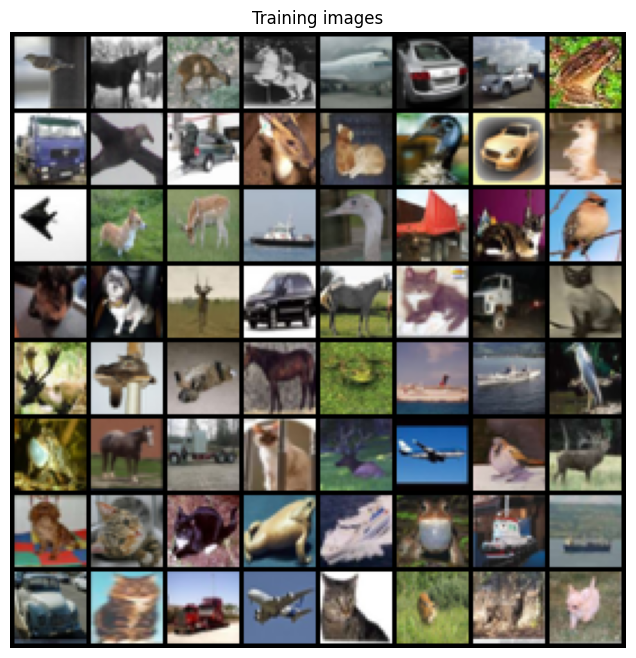

In [7]:
for images, labels in dm.train_dataloader():  
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:64], 
    padding=2,
    normalize=True),
    (1, 2, 0)))
plt.show()

In [8]:
images[0].shape

torch.Size([3, 32, 32])

##Feature Extraction

- However, the ResNet18 model is designed for 224x224 images (https://pytorch.org/vision/main/models/generated/torchvision.models.resnet18.html).

In [9]:
!mkdir logs

In [ ]:
%%capture --no-display

L.seed_everything(123)
dm = Cifar10DataModule(height_width=(224, 224), batch_size=64, num_workers=4)

lightning_model = LightningModel(model=pytorch_model, learning_rate=0.1)

trainer = L.Trainer(
    max_epochs=50,
    accelerator="gpu",
    devices=[0],
    logger=CSVLogger(save_dir="logs/", name="my-model"),
    deterministic=True,
)

In [ ]:
trainer.fit(model=lightning_model, datamodule=dm)

In [ ]:
plot_loss_and_acc(trainer.logger.log_dir)

In [ ]:
trainer.test(model=lightning_model, datamodule=dm)